In [1]:
# imports and global definitions
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from math import sqrt, atan, cos, pi


In [2]:
# Functions from Exercise sheet
def f1(x):
    if hasattr(x, "__len__"):
        return [f1(x) for x in x]
    else:
        return sqrt(x)

def f2(x):
    if hasattr(x, "__len__"):
        return [f2(x) for x in x]
    else:
        return atan(10.0*x)


In [3]:
# Lagrane Interpolation as explored in previous exercise
# l_i(x)
def Lagrange (pts, i, x):
    prod = 1
    for j in range(len(pts)):
        if j != i:
            prod = prod * (x-pts[j])/(pts[i]-pts[j])
    return prod

# p(x)
def InterpolationPolynomial (fun, pts, x):
    sum = 0
    for i in range(len(pts)):
        sum = sum + fun(pts[i]) * Lagrange(pts, i, x)
    return sum

In [4]:
# Function for generating Chebyshev Points
def chebyshev_points(start, end, count):
    return [5.0*cos( (i+0.5)*pi / (count + 1)) for i in range(count)]

In [5]:
# creates Plots of the function, cubic interpolation and polynomial interpolation
# also plots the convergence
def compareFunctions(f, f_knots, xMin, xMax, plotPoint_count, name="no Name"):
    xVals = np.linspace(xMin, xMax, plotPoint_count)

    f_analyticVals = f(xVals)

    # Cubic Spline Interpolation
    cubicInterpolation = interpolate.CubicSpline(f_knots, [f(x) for x in f_knots])
    cubic_vals = cubicInterpolation(xVals)

    # Polynomial Interpolation
    poly_interpolation = InterpolationPolynomial(f, f_knots, xVals)


    # Plot functions
    plt.cla()
    plt.plot(xVals, f_analyticVals, label="analytic")
    plt.plot(xVals, cubic_vals, label="cubic")
    plt.plot(xVals, poly_interpolation, label="polynomial")
    plt.plot(f_knots, f(f_knots), "x", label="interpolated points")
    plt.legend()
    plt.title(name)
    plt.show()

    # Plot convergence
    plt.cla()
    plt.plot(xVals, abs(f_analyticVals - cubic_vals), label="cubic")
    plt.plot(xVals, abs(f_analyticVals - poly_interpolation), label="polynomial")
    plt.yscale("log")
    plt.legend()
    plt.title("Convergence for " + name)
    plt.show()

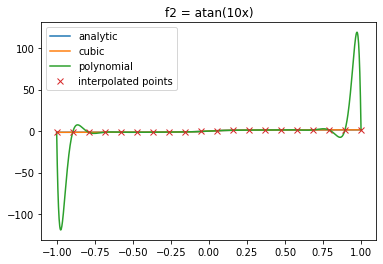

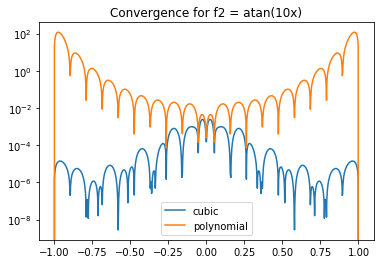

In [6]:
F1_XMIN, F1_XMAX = 0.0, 1.0
F2_XMIN, F2_XMAX = -1.0, 1.0
PLOT_POINT_CNT = 1000

#f1_knots = np.linspace(F1_XMIN, F1_XMAX,10)**1.3
f1_knots = chebyshev_points(F1_XMIN, F1_XMAX, 10)
f2_knots = np.linspace(F2_XMIN, F2_XMAX, 20)
#compareFunctions(f1, f1_knots, F1_XMIN, F1_XMAX, PLOT_POINT_CNT, "f1 = sqrt(x)")
compareFunctions(f2, f2_knots, F2_XMIN, F2_XMAX, PLOT_POINT_CNT, "f2 = atan(10x)")